In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## Import previosly modified datasets

In [63]:
suicide_data = pd.read_csv("dataset/suicide_modified.csv")
happy_data1 = pd.read_csv("dataset/happy_data1_modified.csv")
happy_data2 = pd.read_csv("dataset/happy_data2_modified.csv")
happy_data3 = pd.read_csv("dataset/happy_data3_modified.csv")
happy_data4 = pd.read_csv("dataset/happy_data4_modified.csv")
happy_data5 = pd.read_csv("dataset/happy_data5_modified.csv")

## Suicide data compared with year, age, HDI, gdp

In [64]:
year_list = []
for i in suicide_data.year:
    if year_list.count(i) == 0:
        year_list.append(i)
year_list.sort()

In [65]:
# compared with year
temp = suicide_data[['year','suicides']]
per_year = []
for i in range(32):
    per_year.append(0)
for i in range(27820):
    per_year[suicide_data['year'][i]-1987]+=suicide_data['suicides'][i]
num_suicides = pd.Series(per_year,name='suicides')
year_s = pd.Series(year_list,name='year')
suicide_year= pd.concat([year_s,num_suicides],axis=1)
suicide_year=suicide_year.set_index('year')

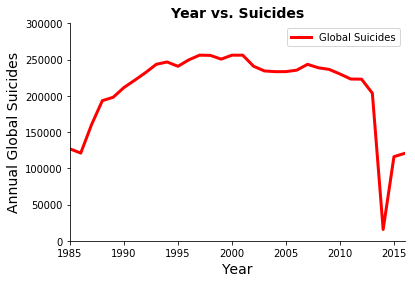

In [66]:
fig, ax = plt.subplots()

suicide_year.suicides.plot(ax = ax, color = 'r', linewidth = 3.0) 

# HERE I'm changing the color and the thickness of the line...

ax.set_title("Year vs. Suicides", fontsize = 14, fontweight = "bold") # Sets the title
ax.set_ylabel("Annual Global Suicides", fontsize = 14,) # The ylable
ax.set_xlabel("Year", fontsize = 14,) # the xlable

ax.set_ylim(-10,10) # This sets the y-limits

ax.legend(["Global Suicides"],frameon=True) # The legend, without a box...

ax.set_ylim(0,300000)
ax.set_xlim(1985,2016) 

ax.spines["right"].set_visible(False) # This removes the ``spines'', just the right and top
ax.spines["top"].set_visible(False) # ones...

plt.show()

In [67]:
# compared with age
temp = suicide_data[['age','suicides']]
suicide_age = [0,0,0,0,0]
for i in range(27820):
    if suicide_data['age'][i] == '5-14 years':
        suicide_age[0]+= suicide_data['suicides'][i]
    elif suicide_data['age'][i] == '15-24 years':
        suicide_age[1]+= suicide_data['suicides'][i]
    elif suicide_data['age'][i] == '35-54 years':
        suicide_age[2]+= suicide_data['suicides'][i]
    if suicide_data['age'][i] == '55-74 years':
        suicide_age[3]+= suicide_data['suicides'][i]
    else:
        suicide_age[4]+= suicide_data['suicides'][i]
        
sum_num = suicide_age[0]+suicide_age[1]+suicide_age[2]+suicide_age[3]+suicide_age[4]
suicide_age
percent_list = [] 
year_range = ['5-14 years','15-24 years','35-54 years', '55-74 years','75+ years']
for i in range(5):
    percent_list.append(suicide_age[i]/sum_num*100)

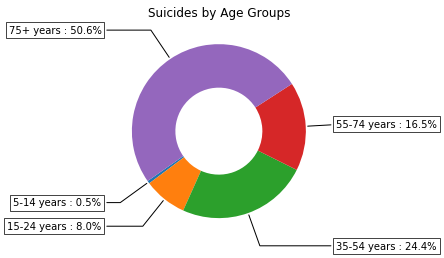

In [68]:
fig, ax = plt.subplots(figsize=(6, 4), subplot_kw=dict(aspect="equal"))

recipe = ['5-14 years : 0.5%','15-24 years : 8.0%','35-54 years : 24.4%', '55-74 years : 16.5%','75+ years : 50.6%']

wedges, texts = ax.pie(percent_list, wedgeprops=dict(width=0.5), startangle=-145)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Suicides by Age Groups")

plt.show()

In [69]:
suicide_hdi = suicide_data[['country','suicides','HDI_for_year']]


In [70]:
suicide_hdi = suicide_hdi.dropna()

In [71]:
suicide_hdi =suicide_hdi.reset_index(drop = True)

In [124]:
grouped = suicide_hdi.groupby('country')
.groupby('HDI_for_year')


AttributeError: Cannot access callable attribute 'groupby' of 'DataFrameGroupBy' objects, try using the 'apply' method

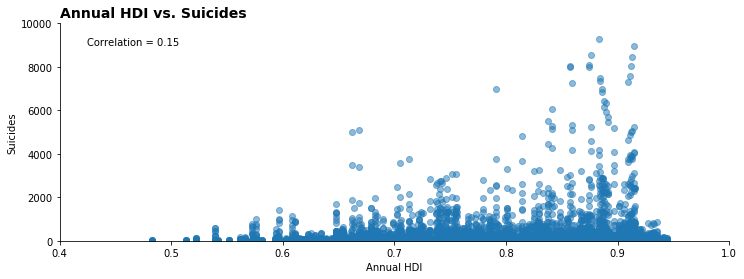

In [72]:
fig, ax = plt.subplots( figsize = (12,4)) 

ax.scatter(suicide_hdi["HDI_for_year"], suicide_hdi["suicides"], alpha= 0.5)

ax.set_title('Annual HDI vs. Suicides ', loc='left', fontsize=14, fontweight = "bold") 

ax.set_xlabel("Annual HDI")
ax.set_ylabel("Suicides")

ax.spines["right"].set_visible(False) 
ax.spines["top"].set_visible(False) 

ax.set_xlim(0.4,1) 
ax.set_ylim(0,10000) 

corr_mat = suicide_hdi.corr()
cr = corr_mat.suicides.HDI_for_year

message = "Correlation = " + str(round(cr,2)) 

ax.text(0.425,9000, message, horizontalalignment='left')

plt.show()

In [112]:
suicide_gdp = suicide_data[['country','gdp_for_year','gdp_per_capita','suicides']]
suicide_gdp.gdp_for_year = suicide_gdp.gdp_for_year.apply(np.int64)
suicide_gdp["gdp_for_year_million"] = suicide_gdp.gdp_for_year/1000000000

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


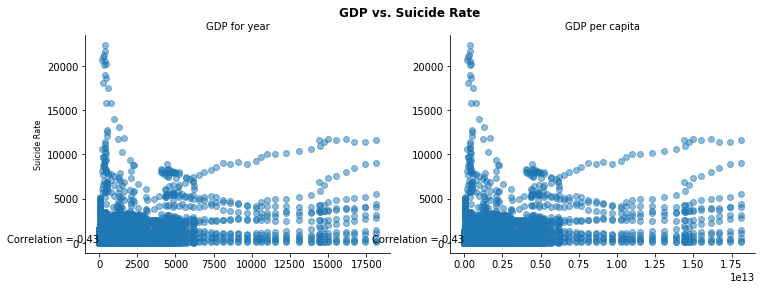

In [111]:
fig, ax = plt.subplots(nrows = 1, ncols = 2 ,figsize = (12,4)) 

var_list = ["gdp_for_year_million","gdp_for_year"]
nice_name = ["GDP for year","GDP per capita"]

corr_mat = suicide_gdp.corr() # This is the correlation matrix of the data series in the df

count = 0

for xxx in ax:
    
    xxx.scatter(suicide_gdp[var_list[count]],suicide_gdp["suicides"], alpha= 0.50) # Scatter plot
    
    xxx.set_title(nice_name[count], fontsize = 10) # This stuff sets the title for each of the subplots...
    
    xxx.spines["right"].set_visible(False) # remove the top and right spines
    
    xxx.spines["top"].set_visible(False) # Same as above
    
    if count == 0: # I only one the x label for the bottom ones...
        xxx.set_ylabel("Suicide Rate", fontsize = 8) # set the x label to year
    cr = corr_mat.suicides[var_list[count]] # get the correlation matrix
    
    message = "Correlation = " + str(round(cr,2)) # put the stuff together

    xxx.text(10, 10, message, horizontalalignment='right') # print the message in the text box on the figure
      
    count +=1
    
fig.suptitle("GDP vs. Suicide Rate", fontsize = 12, fontweight = "bold") # big titel


plt.show()

In [113]:
suicide_gdp

,country,gdp_for_year,gdp_per_capita,suicides,gdp_for_year_million
0,Albania,2156624900,796,21,2.156625
1,Albania,2156624900,796,16,2.156625
2,Albania,2156624900,796,14,2.156625
3,Albania,2156624900,796,1,2.156625
4,Albania,2156624900,796,9,2.156625
5,Albania,2156624900,796,1,2.156625
6,Albania,2156624900,796,6,2.156625
7,Albania,2156624900,796,4,2.156625
8,Albania,2156624900,796,1,2.156625
9,Albania,2156624900,796,0,2.156625


In [ ]:
grouped = suicide_gdp.groupby('')